<a href="https://colab.research.google.com/github/Chyreen/Using-NLP-and-machine-learning-techniques-to-identify-undervalued-football-players/blob/main/EDA_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Using NLP and machine learning techniques to identify undervalued football players.**

In [ ]:
import pandas as pd
import numpy as np

## Reading the newsdatabase files, News and Miao newsfeed extracted through elastic search on docker

In [ ]:
news = pd.read_csv('/content/drive/MyDrive/Project_excel_files/news_feed_data.csv')
news.info()

<ipython-input-3-fdd850c66c02>:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  news = pd.read_csv('/content/drive/MyDrive/Project_excel_files/news_feed_data.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135006 entries, 0 to 135005
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   categories       135006 non-null  object
 1   url              135006 non-null  object
 2   title            134983 non-null  object
 3   content          135006 non-null  object
 4   author           135006 non-null  object
 5   date             135006 non-null  object
 6   spider_type      135006 non-null  object
 7   file_name        135006 non-null  object
 8   video_generated  223 non-null     object
dtypes: object(9)
memory usage: 9.3+ MB


In [ ]:
news['categories'].value_counts()

,count
categories,
['Manchester United'],56748
['Manchester City'],32694
['Aston Villa'],16619
"[""Women's Football""]",15843
['Brighton & Hove Albion'],10975
"[""FIFA Women's World Cup 2023""]",2061
"[""FIFA Women's World Cup""]",66


In [ ]:
miao = pd.read_csv('/content/drive/MyDrive/Project_excel_files/miao_feed_data.csv')
miao.info()

<ipython-input-6-caf2efa07a43>:1: DtypeWarning: Columns (8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  miao = pd.read_csv('/content/drive/MyDrive/Project_excel_files/miao_feed_data.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77847 entries, 0 to 77846
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   url              77847 non-null  object
 1   title            77847 non-null  object
 2   author           77847 non-null  object
 3   content          77847 non-null  object
 4   date             77756 non-null  object
 5   title_image      75341 non-null  object
 6   spider_type      77847 non-null  object
 7   summary          72465 non-null  object
 8   mini_summary_cn  14784 non-null  object
 9   keywords         72465 non-null  object
 10  summary_cn       14785 non-null  object
 11  title_cn         72438 non-null  object
 12  mini_summary     65455 non-null  object
 13  file_name        68755 non-null  object
 14  chunks           64193 non-null  object
 15  translations     64193 non-null  object
 16  video_generated  5995 non-null   object
dtypes: object(17)
memory usage: 10.

Dropping unnecessary columns

In [ ]:
drop_columns = ['spider_type', 'mini_summary_cn', 'summary_cn', 'title_cn', 'video_generated', 'translations', 'file_name', 'mini_summary', 'title_image', 'url', 'chunks', 'keywords', 'summary']
miao.drop(drop_columns, axis = 1, inplace =True)

In [ ]:
miao.info()
miao.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77847 entries, 0 to 77846
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    77847 non-null  object
 1   author   77847 non-null  object
 2   content  77847 non-null  object
 3   date     77756 non-null  object
dtypes: object(4)
memory usage: 2.4+ MB


,title,author,content,date
0,Stefano Pioli praises Rafael Leao following AC...,['Omar Garrick'],"<html><body><div><div class=""sc-294a6039-6 fbD...",2023-04-19
1,Todd Boehly and Co have nowhere left to go aft...,['Sam Wallace'],"<html><body><div><div class=""component article...",2023-04-19
2,Agents exam day – and why they are railing aga...,['Dan Sheldon'],"<html><body><div><div class=""sc-294a6039-6 fbD...",2023-04-19


In [ ]:
drop_columns = ['spider_type','video_generated', 'file_name', 'url', 'categories']
news.drop(drop_columns, axis = 1, inplace = True)

In [ ]:
news.info()
news.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135006 entries, 0 to 135005
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   title    134983 non-null  object
 1   content  135006 non-null  object
 2   author   135006 non-null  object
 3   date     135006 non-null  object
dtypes: object(4)
memory usage: 4.1+ MB


,title,content,author,date
0,10 most expensive Premier League keepers with ...,"<div id=""readability-page-1"" class=""page""><div...",['Matthew Cooper'],2023-09-25T14:31:18Z
1,Gran in crash with Marcus Rashford had no idea...,"<div id=""readability-page-1"" class=""page""><div...",['Liam Coleman'],2023-09-25T15:58:13Z
2,Match preview: United v Palace,"<div id=""readability-page-1"" class=""page""><div...",['Matthew Holt'],2023-09-25T16:12:33Z


### Convert date column to datetime datatype

In [ ]:
news['date'] = pd.to_datetime(news['date'])

# make timezone naive
news['date'] = news['date'].dt.tz_convert(None)

news.info()
news.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135006 entries, 0 to 135005
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    134983 non-null  object        
 1   content  135006 non-null  object        
 2   author   135006 non-null  object        
 3   date     135006 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 4.1+ MB


,title,content,author,date
0,10 most expensive Premier League keepers with ...,"<div id=""readability-page-1"" class=""page""><div...",['Matthew Cooper'],2023-09-25 14:31:18
1,Gran in crash with Marcus Rashford had no idea...,"<div id=""readability-page-1"" class=""page""><div...",['Liam Coleman'],2023-09-25 15:58:13
2,Match preview: United v Palace,"<div id=""readability-page-1"" class=""page""><div...",['Matthew Holt'],2023-09-25 16:12:33


In [ ]:
news.dropna(inplace=True)

In [ ]:
news = news.reindex(columns=['title', 'author', 'content', 'date'])

### Further conversion on date column in Miao feed

Upon further scrutiny, it was discovered that the date column had not only date and time info but also time zone which required taking the following steps.

In [ ]:
from dateutil import parser

# parsing the dates with dateutil
def parse_date(date_str):
    try:
        return pd.Timestamp(parser.parse(date_str))
    except (parser.ParserError, ValueError, TypeError):
        return pd.NaT

miao['date'] = miao['date'].apply(parse_date)

# Conversion from timezone-aware timestamps to UTC to naive timestamps
def to_utc_naive(date):
    if pd.isna(date):
        return date
    if date.tzinfo is not None:
        return date.tz_convert('UTC').tz_localize(None)
    return date

miao['date'] = miao['date'].apply(lambda x: to_utc_naive(pd.Timestamp(x)))


# drop rows with no time input
miao.dropna(subset=['date'], inplace=True)

print(miao.info())

In [ ]:
miao.iloc[30890:30990,:].head(3)

,title,author,content,date
30980,Manchester United 'open talks with Adrien Rabi...,['Adam Shergold'],<h2>Manchester United 'open talks with Adrien ...,2023-06-26 05:45:39
30981,Brighton forward Abdallah Sima in talks over R...,"['Simon Jones', 'Adam Shergold']",<h2>Brighton forward Abdallah Sima in talks ov...,2023-06-26 05:17:18
30982,Man City should sell four players in the summe...,['Daniel Murphy'],"<div id=""readability-page-1"" class=""page""><div...",2023-06-26 05:00:00


Merged both database content file

In [ ]:
n_m = pd.concat([news, miao], axis=0)

In [ ]:
len(n_m)

212739

In [ ]:
n_m.head()

,title,author,content,date
0,10 most expensive Premier League keepers with ...,['Matthew Cooper'],"<div id=""readability-page-1"" class=""page""><div...",2023-09-25 14:31:18
1,Gran in crash with Marcus Rashford had no idea...,['Liam Coleman'],"<div id=""readability-page-1"" class=""page""><div...",2023-09-25 15:58:13
2,Match preview: United v Palace,['Matthew Holt'],"<div id=""readability-page-1"" class=""page""><div...",2023-09-25 16:12:33
3,Man Utd want €50m LaLiga star in huge January ...,['James Marshment'],"<div id=""readability-page-1"" class=""page""><div...",2023-09-25 15:51:58
4,Pep Guardiola delivers new injury update on Ma...,['Tom Procter'],"<div id=""readability-page-1"" class=""page""><art...",2023-09-25 15:34:43


From the sample above, it is apparent to further clean and eliminate html element tags in the content column to enhance model building and interpretation. This is achieved with the use of beautifulsoup library

To save time and energy, I ran the following once and saved to a csv file 'file' that will subsequently be called if needed.

In [ ]:
from bs4 import BeautifulSoup

# to remove html tag elements in the content column
def content_fxn(html_element):
    soup = BeautifulSoup(html_element, 'html.parser')
    return soup.get_text(separator=" ", strip=True)

# applying the function on the content column
n_m['content'] = n_m['content'].apply(content_fxn)

In [ ]:
#file = n_m.to_csv('/content/drive/MyDrive/Project_excel_files/n_m_csv.csv')

In [ ]:
n_m_clean = pd.read_csv('/content/drive/MyDrive/Project_excel_files/n_m_csv.csv')
n_m_clean.drop(n_m_clean.columns[[0]], axis=1, inplace=True)
n_m_clean.head(3)

,title,author,content,date
0,10 most expensive Premier League keepers with ...,['Matthew Cooper'],The top 10 most valuable Premier League goalke...,2023-09-25 14:31:18
1,Gran in crash with Marcus Rashford had no idea...,['Liam Coleman'],The England striker was involved in the crash ...,2023-09-25 15:58:13
2,Match preview: United v Palace,['Matthew Holt'],Skip to Main NavigationSkip to content How to ...,2023-09-25 16:12:33


#### In between this are lines of code that contain tokenization, lemmatization and sentiment analysis techniques based on wordNet database and Vader_lexicon model. The goal is to compare techniques and have a more robust research.

Saving the dataframe for further use and analysis

In [ ]:
# sent_file = sent_file.to_csv('/content/drive/MyDrive/Project_excel_files/sent_file.csv')

In [ ]:
sent_file = pd.read_csv('/content/drive/MyDrive/Project_excel_files/sent_file.csv')
sent_file.head(3)

,title,content,date,tokenized_content,sentiment_score,year,month,tokenized_title,title_sentiment_score
0,10 most expensive Premier League keepers with ...,The top 10 most valuable Premier League goalke...,2023-09-25 14:31:18,top valuable premier league goalkeeper reveale...,0.9989,2023,9,expensive premier league keeper alisson ederso...,0.0000
1,Gran in crash with Marcus Rashford had no idea...,The England striker was involved in the crash ...,2023-09-25 15:58:13,england striker involved crash grandmother yes...,0.9496,2023,9,gran crash marcus rashford idea,-0.4019
2,Match preview: United v Palace,Skip to Main NavigationSkip to content How to ...,2023-09-25 16:12:33,skip main navigationskip content follow united...,0.9982,2023,9,match preview united v palace,0.4215


In [ ]:
sent_file['year'].value_counts()

,count
year,
2023,149871
2024,62714
2022,101
2020,19
2021,14
2018,4
2019,3
2013,3
2015,2


In [ ]:
# adding sentiment polarity column to categorize the sentiment score for content column
sent_file['sent_cat_content'] = pd.cut(sent_file['sentiment_score'], bins=[-1,-0.95,-0.9,0.9, 0.95, 1], labels=[1, 2, 3, 4, 5])
# adding sentiment polarity column to categorize the sentiment score for title column
sent_file['sent_cat_title'] = pd.cut(sent_file['title_sentiment_score'], bins=[-1,-0.5,-0.25,0.25, 0.5, 1], labels=[1, 2, 3, 4, 5])
sent_file.head(3)

,title,content,date,tokenized_content,sentiment_score,year,month,tokenized_title,title_sentiment_score,sent_cat_content,sent_cat_title
0,10 most expensive Premier League keepers with ...,The top 10 most valuable Premier League goalke...,2023-09-25 14:31:18,top valuable premier league goalkeeper reveale...,0.9989,2023,9,expensive premier league keeper alisson ederso...,0.0000,5,3
1,Gran in crash with Marcus Rashford had no idea...,The England striker was involved in the crash ...,2023-09-25 15:58:13,england striker involved crash grandmother yes...,0.9496,2023,9,gran crash marcus rashford idea,-0.4019,4,2
2,Match preview: United v Palace,Skip to Main NavigationSkip to content How to ...,2023-09-25 16:12:33,skip main navigationskip content follow united...,0.9982,2023,9,match preview united v palace,0.4215,5,4


Random selection of players to form a subset

In [ ]:
nameSearch = ["Saka", "Bukayo", "Rashford", "Marcus", "Erling", "Haaland", "Henry", "Kane", "Kevin", "De", "Bruyne", "Foden", "Phil","Victor", "Osimhen", "Antony", "Santos", "kylian", "Mbappé", "Gabriel", "Jesus", "Vinicius", "Junior", "Jordan", "Pickford"]
# To filter rows where the names exists in the column
result = sent_file[sent_file['title'].apply(lambda tokens: any(word in tokens for word in nameSearch))]
result.head(3)

,title,content,date,tokenized_content,sentiment_score,year,month,tokenized_title,title_sentiment_score,sent_cat_content,sent_cat_title
1,Gran in crash with Marcus Rashford had no idea...,The England striker was involved in the crash ...,2023-09-25 15:58:13,england striker involved crash grandmother yes...,0.9496,2023,9,gran crash marcus rashford idea,-0.4019,4,2
22,Kalvin Phillips says he is actually really ins...,Manchester City outcast Kalvin Phillips has sa...,2023-09-25 20:09:39,manchester city outcast kalvin phillips said v...,0.9922,2023,9,kalvin phillips say actually really inspired m...,0.5413,5,5
27,'We knew' - Billy Gilmour makes Kaoru Mitoma a...,Brighton and Hove Albion Billy Gilmour admits ...,2023-09-25 19:48:07,brighton hove albion billy gilmour admits brig...,0.4939,2023,9,knew billy gilmour make kaoru mitoma admission...,0.0000,3,3


In [ ]:
len(result)

23421

In [ ]:
result = result.iloc[:10000,:]

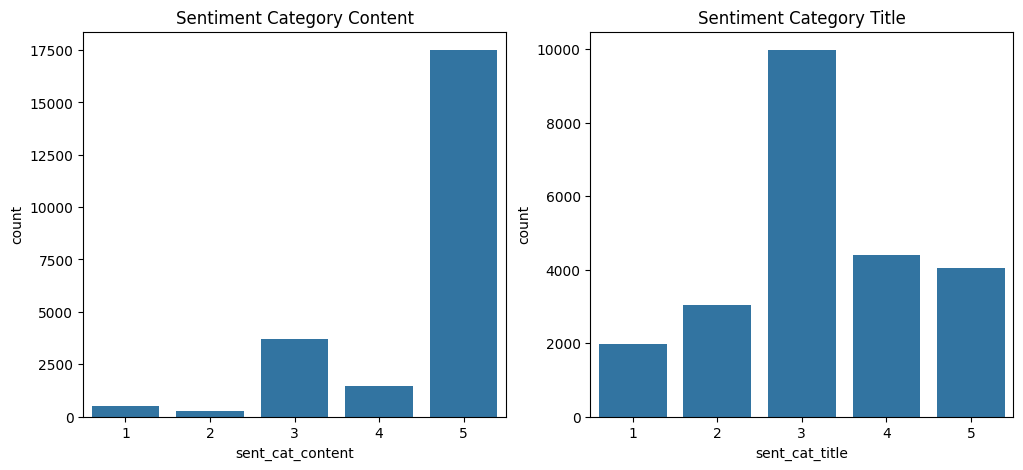

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# plot for sentiment category content
sns.countplot(x='sent_cat_content', data=result, ax=axes[0])
axes[0].set_title('Sentiment Category Content')
# plot for sentiment category title
sns.countplot(x='sent_cat_title', data=result, ax=axes[1])
axes[1].set_title('Sentiment Category Title')

plt.show()

In [ ]:
# Grouping by year and month, cummulating the content sentiment scores
resultByContent = result.groupby(['year', 'month'])['sentiment_score'].apply(lambda x: x.mode()[0]).reset_index()

# Create a new column combining year and month
resultByContent['year_month'] = pd.to_datetime(resultByContent[['year', 'month']].assign(day=1))

# Grouping by year and month, cummulating the sentiment scores
resultByTitle = result.groupby(['year', 'month'])['title_sentiment_score'].apply(lambda x: x.mode()[0]).reset_index()

# Create a new column combining year and month
resultByTitle['year_month'] = pd.to_datetime(resultByTitle[['year', 'month']].assign(day=1))

In [ ]:
resultByTitle.head(10)

,year,month,title_sentiment_score,year_month
0,2018,5,0.2263,2018-05-01
1,2019,3,0.7964,2019-03-01
2,2021,4,0.0000,2021-04-01
3,2022,1,0.4215,2022-01-01
4,2022,2,0.5106,2022-02-01
5,2022,4,-0.3182,2022-04-01
6,2022,5,0.0000,2022-05-01
7,2022,6,0.0000,2022-06-01
8,2022,7,-0.5448,2022-07-01
9,2022,8,-0.1280,2022-08-01


In [ ]:
resultByContent.head(10)

,year,month,sentiment_score,year_month
0,2018,5,0.9995,2018-05-01
1,2019,3,0.9894,2019-03-01
2,2021,4,0.9998,2021-04-01
3,2022,1,0.9891,2022-01-01
4,2022,2,1.0000,2022-02-01
5,2022,4,0.8979,2022-04-01
6,2022,5,0.9865,2022-05-01
7,2022,6,0.9991,2022-06-01
8,2022,7,0.9885,2022-07-01
9,2022,8,0.9801,2022-08-01


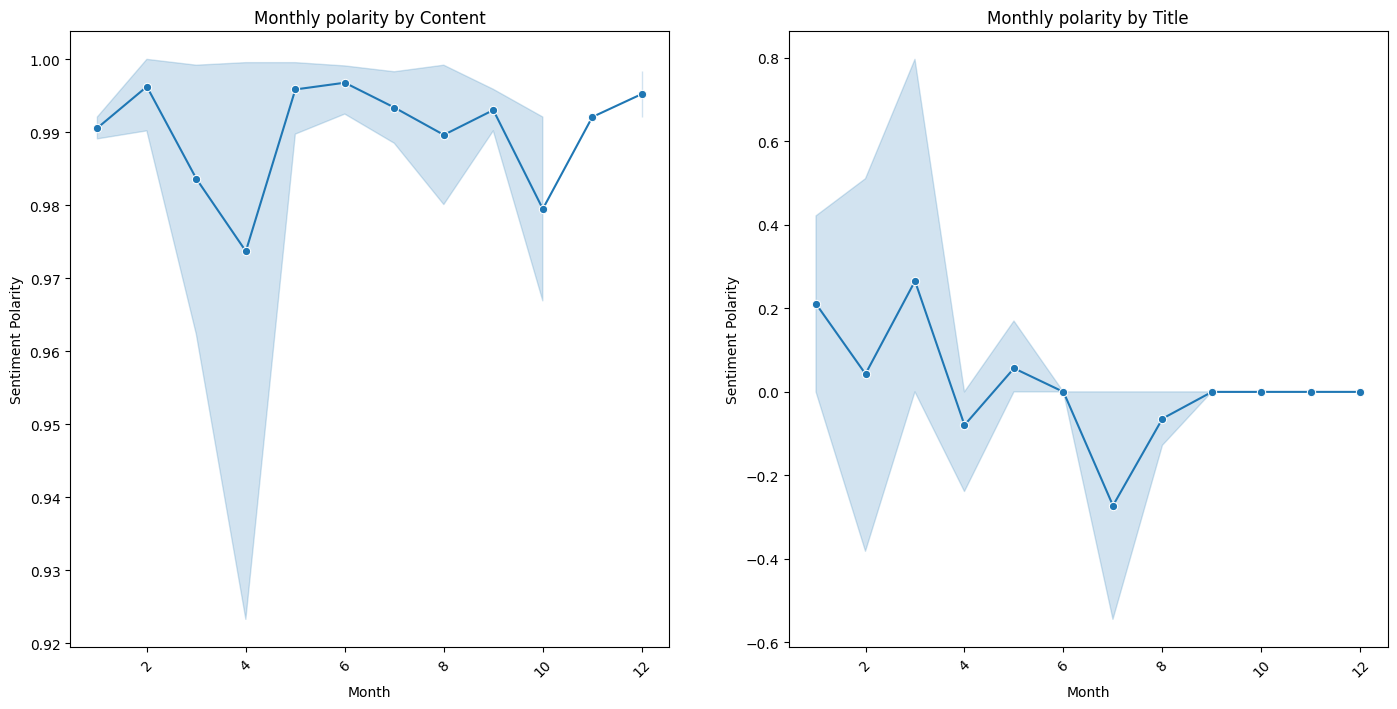

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(17, 8))

# Line plot for sent_cat_content
sns.lineplot(x='month', y='sentiment_score', data=resultByContent, marker='o', ax=axes[0])
axes[0].set_title('Monthly polarity by Content')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Sentiment Polarity')
axes[0].tick_params(axis='x', rotation=45)

# Line plot for sent_cat_title
sns.lineplot(x='month', y='title_sentiment_score', data=resultByTitle, marker='o', ax=axes[1])
axes[1].set_title('Monthly polarity by Title')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Sentiment Polarity')
axes[1].tick_params(axis='x', rotation=45)

plt.show()

### For a robust analysis, a pretrained model is implemented to compare sentiment analysis results

Using BERT, a transformers pretrained model

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:399: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(checkpoint_file, map_location="cp

In [ ]:
def sentiment_score(tokenized_content, max_length=512, stride=32):
    """
    Compute sentiment score directly from pre-tokenized content.

    Args:
        tokenized_content (torch.Tensor): Pre-tokenized input (e.g., token IDs) from DataFrame.
        max_length (int): Maximum token length for each chunk.
        stride (int): Number of overlapping tokens between chunks.

    Returns:
        int: The predicted sentiment class (1 to 5).
    """

    # Check if tokenized_content is empty and return a default value if it is
    if len(tokenized_content) == 0:
        return 1 # for example, return a neutral sentiment

    # Create overlapping chunks
    chunks = [tokenized_content[i:i + max_length] for i in range(0, len(tokenized_content), max_length - stride)]

    # Process each chunk and aggregate the results
    all_scores = []
    for chunk in chunks:
        chunk = chunk.unsqueeze(0)  # Add batch dimension
        with torch.no_grad():
            result = model(chunk)
            # Ensure result.logits is not None and has data before appending
            if result.logits is not None:
                all_scores.append(result.logits)

    # Check if all_scores is still empty after processing chunks
    if len(all_scores) == 0:
        return 1 # for example, return a neutral sentiment

    # Aggregate the logits from each chunk
    aggregated_logits = torch.mean(torch.stack(all_scores), dim=0)

    # Determine the final sentiment score (BERT output classes range from 0 to 4, add 1 for 1 to 5)
    sentiment_class = int(torch.argmax(aggregated_logits)) + 1

    return sentiment_class

In [ ]:
def convert_to_list(tokenized_str):
     if isinstance(tokenized_str, str):
        return tokenized_str.split()
     else:
        # to handle non-string values
         return []

result['tokenized_list'] = result['tokenized_content'].apply(convert_to_list)

<ipython-input-26-34e1ad3df88e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['tokenized_list'] = result['tokenized_content'].apply(convert_to_list)


In [ ]:
def tokens_to_ids(tokens):
    return tokenizer.convert_tokens_to_ids(tokens)

result['tokenized_ids'] = result['tokenized_list'].apply(tokens_to_ids)

<ipython-input-27-0f2383c6f6c5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['tokenized_ids'] = result['tokenized_list'].apply(tokens_to_ids)


In [ ]:
result['tokenized_tensor'] = result['tokenized_ids'].apply(lambda x: torch.tensor(x, dtype=torch.long))

<ipython-input-28-38da7ee4e82f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['tokenized_tensor'] = result['tokenized_ids'].apply(lambda x: torch.tensor(x, dtype=torch.long))


In [ ]:
result['sentiment_score'] = result['tokenized_tensor'].apply(sentiment_score)

In [ ]:
first3 = result

In [ ]:
first3.shape

(23421, 14)

## Integration of coreference resolution technique

The following is from Medium website-- [Here](https://gist.github.com/thomashacker/b5dd6042c092e0a22c2b9243a64a2466)

In [ ]:
!pip install https://github.com/explosion/spacy-experimental/releases/download/v0.6.1/en_coreference_web_trf-3.4.0a2-py3-none-any.whl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 490.3/490.3 MB 870.8 kB/s eta 0:00:00


In [ ]:
import spacy
from spacy.tokens import Doc
from wasabi import msg


# Load the spaCy model
nlp = spacy.load("en_coreference_web_trf")

def resolve_references(doc: Doc) -> str:
    token_mention_mapper = {}
    output_string = ""
    clusters = [val for key, val in doc.spans.items() if key.startswith("coref_cluster")]

    for cluster in clusters:
        first_mention = cluster[0]
        for mention_span in list(cluster)[1:]:
            token_mention_mapper[mention_span[0].idx] = first_mention.text + mention_span[0].whitespace_
            for token in mention_span[1:]:
                token_mention_mapper[token.idx] = ""

    for token in doc:
        if token.idx in token_mention_mapper:
            output_string += token_mention_mapper[token.idx]
        else:
            output_string += token.text + token.whitespace_
    return output_string

# Truncate or split text to fit within the model's max token limit
def truncate_text(text, max_length=512):
    # Using the whitespace tokenizer to split the text by words/tokens
    tokens = text.split()
    # Truncate to the maximum length
    if len(tokens) > max_length:
        return ' '.join(tokens[:max_length])
    return text

# Apply the function with truncation
first3['resolved_content'] = first3['content'].apply(lambda text: resolve_references(nlp(truncate_text(text))))

first3.head(2)

/usr/local/lib/python3.10/dist-packages/spacy_transformers/layers/hf_shim.py:118: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self._model.load_state_dict(torch.load(fileli

,title,content,date,tokenized_content,sentiment_score,year,month,tokenized_title,title_sentiment_score,sent_cat_content,sent_cat_title,tokenized_list,tokenized_ids,tokenized_tensor,resolved_content
1,Gran in crash with Marcus Rashford had no idea...,The England striker was involved in the crash ...,2023-09-25 15:58:13,england striker involved crash grandmother yes...,3,2023,9,gran crash marcus rashford idea,-0.4019,4,2,"[gran, crash, marcus, rashford, idea]","[11121, 26613, 16148, 100, 14653]","[tensor(11121), tensor(26613), tensor(16148), ...",Gran in crash with Marcus Rashford had no idea...
22,Kalvin Phillips says he is actually really ins...,Manchester City outcast Kalvin Phillips has sa...,2023-09-25 20:09:39,manchester city outcast kalvin phillips said v...,3,2023,9,kalvin phillips say actually really inspired m...,0.5413,5,5,"[kalvin, phillips, say, actually, really, insp...","[100, 23901, 16497, 23785, 25165, 25352, 10564...","[tensor(100), tensor(23901), tensor(16497), te...",Kalvin Phillips says Kalvin Phillips is actual...


In [ ]:
print(first3['resolved_content'][1])

Gran in crash with Marcus Rashford had no idea who Gran in crash with Marcus Rashford was


### Named Entity Recognition (NER)

In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")

# Create the NER pipeline
nlp = pipeline("ner", model=model, tokenizer=tokenizer)

# Converting the coreference resoluted content column to a list
player = first3['content'].tolist()

# Perform NER on each row in the resolved content column and filter for only person entities
person_entities = [[entity['word'] for entity in nlp(text) if entity['entity'] in ['B-PER', 'I-PER']] for text in player]

# Adding the identified persons column
first3['person_entities'] = person_entities

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

<ipython-input-24-0273f8796a44>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first3['person_entities'] = person_entities


In [ ]:
len(first3)

23421

In [ ]:
# Define a function to merge subword tokens into a list of names
def merge_subwords(tokens):
    merged_tokens = []
    current_word = ""

    for token in tokens:
        if token.startswith("##"):
            current_word += token[2:]
        else:
            if current_word:
                merged_tokens.append(current_word)
            current_word = token

    if current_word:
        merged_tokens.append(current_word)

    return merged_tokens  # Return as a list of merged tokens


# Apply the function to each row in the 'person_entities' column
first3['person_entities'] = first3['person_entities'].apply(merge_subwords)

print(first3['person_entities'].iloc[0])


['Gran', 'Marcus', 'Rashford']


<ipython-input-26-4c9e8d75f128>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first3['person_entities'] = first3['person_entities'].apply(merge_subwords)


In [ ]:
def merge_person_entities(entities):
    merged_entities = []
    current_name = []

    # Loop through each token in the entities
    for entity in entities:
        # If the entity is a valid word (no punctuation or digits)
        if entity.isalpha():
            current_name.append(entity)  # Add the entity to the current name

        # If the current name list is long enough (2 words or more), or if a new name starts, merge
        if len(current_name) > 1:
            merged_entities.append(" ".join(current_name))  # Join full name and add
            current_name = []  # Reset for the next name

    # Add the last name if there is any remaining
    if current_name:
        merged_entities.append(" ".join(current_name))

    return merged_entities


# Step 2: Apply the improved full name merging
first3['person_entities'] = first3['person_entities'].apply(merge_person_entities)

# Print the results to verify
print(first3['person_entities'].iloc[0])


['Gran Marcus', 'Rashford']


<ipython-input-27-8249bf42763e>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first3['person_entities'] = first3['person_entities'].apply(merge_person_entities)


In [ ]:
#  function to remove repeated names after merging
def remove_duplicates(entities):
    seen = set()
    unique_entities = []

    for entity in entities:
        # Normalize the entity to lowercase to avoid case-sensitive duplicates
        normalized_entity = entity.lower()

        if normalized_entity not in seen:
            unique_entities.append(entity)  # Add the original name (preserving case)
            seen.add(normalized_entity)  # Store the normalized name in the seen set

    return unique_entities

# Apply the deduplication function after merging person entities
first3['person_entities'] = first3['person_entities'].apply(remove_duplicates)

# Print the results to verify
print(first3['person_entities'].iloc[0])

['Gran Marcus', 'Rashford']


<ipython-input-28-5d601f5dc1ab>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first3['person_entities'] = first3['person_entities'].apply(remove_duplicates)


Specific sentiment polarity for the Name entities

In [ ]:
import re
from transformers import pipeline

# Create a sentiment analysis pipeline with a model that outputs sentiment labels as classes
sentiment_analyzer = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment", framework="pt")


# Define a mapping of sentiment labels to integer values
label_to_int = {
    '1 star': 1,
    '2 stars': 2,
    '3 stars': 3,
    '4 stars': 4,
    '5 stars': 5
}


def extract_sentences_with_entities(text, entities):
    """Extract sentences that contain any of the entities."""
    sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', text)
    return [sentence for sentence in sentences if any(entity in sentence for entity in entities)]

def analyze_entity_sentiment(text, entities):
    """Analyze sentiment for sentences containing the entities and return detailed scores as integers."""
    # Ensure entities are strings
    entities = [str(entity) for entity in entities]
    sentences = extract_sentences_with_entities(text, entities)

    # Create a dictionary to store sentiment scores for each entity
    entity_scores = {entity: [] for entity in entities}

    for sentence in sentences:
        sentence_entities = [entity for entity in entities if entity in sentence]
        if sentence_entities:
            sentiment_results = sentiment_analyzer(sentence)
            for result in sentiment_results:
                label = result['label']
                # Convert sentiment label to integer using the label_to_int mapping
                score = label_to_int.get(label, 3)  # Default to neutral (3 stars) if label is not found
                for entity in sentence_entities:
                    entity_scores[entity].append(score)

    # Aggregate sentiment scores for each entity
    aggregated_scores = {}
    for entity, scores in entity_scores.items():
        if scores:
            average_score = sum(scores)/len(scores)  # Calculate average score
            aggregated_scores[entity] = round(average_score)  # Round to nearest integer

    return aggregated_scores

# Apply the sentiment analysis and aggregation to each row based on person entities
first3['entity_sentiment_scores'] = first3.apply(lambda row: analyze_entity_sentiment(row['content'], row['person_entities']), axis=1)

# Display the DataFrame with content, person entities, and their corresponding detailed sentiment scores
first3.head(3)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:399: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serializ

,title,content,date,tokenized_content,sentiment_score,year,month,tokenized_title,title_sentiment_score,sent_cat_content,sent_cat_title,tokenized_list,tokenized_ids,tokenized_tensor,resolved_content,person_entities,entity_sentiment_scores
1,Gran in crash with Marcus Rashford had no idea...,The England striker was involved in the crash ...,2023-09-25 15:58:13,england striker involved crash grandmother yes...,3,2023,9,gran crash marcus rashford idea,-0.4019,4,2,"[gran, crash, marcus, rashford, idea]","[11121, 26613, 16148, 100, 14653]","[tensor(11121), tensor(26613), tensor(16148), ...",Gran in crash with Marcus Rashford had no idea...,"[Gran Marcus, Rashford]",{'Rashford': 1}
22,Kalvin Phillips says he is actually really ins...,Manchester City outcast Kalvin Phillips has sa...,2023-09-25 20:09:39,manchester city outcast kalvin phillips said v...,3,2023,9,kalvin phillips say actually really inspired m...,0.5413,5,5,"[kalvin, phillips, say, actually, really, insp...","[100, 23901, 16497, 23785, 25165, 25352, 10564...","[tensor(100), tensor(23901), tensor(16497), te...",Kalvin Phillips says Kalvin Phillips is actual...,[Kalvin Phillips],{'Kalvin Phillips': 4}
27,'We knew' - Billy Gilmour makes Kaoru Mitoma a...,Brighton and Hove Albion Billy Gilmour admits ...,2023-09-25 19:48:07,brighton hove albion billy gilmour admits brig...,5,2023,9,knew billy gilmour make kaoru mitoma admission...,0.0000,3,3,"[knew, billy, gilmour, make, kaoru, mitoma, ad...","[36963, 16214, 68435, 12696, 100, 100, 68239, ...","[tensor(36963), tensor(16214), tensor(68435), ...",'We knew' - Billy Gilmour makes Kaoru Mitoma a...,"[Billy Gilmour, Kaoru Mitoma, Roberto De, Zerbi]","{'Billy Gilmour': 4, 'Kaoru Mitoma': 4, 'Rober..."


In [ ]:
print(first3['entity_sentiment_scores'])

1                                           {'Rashford': 1}
22                                   {'Kalvin Phillips': 4}
27        {'Billy Gilmour': 4, 'Kaoru Mitoma': 4, 'Rober...
66                             {'De Bruyne': 1, 'Rodri': 1}
78                     {'Simon Jordan': 1, 'Unai Emery': 1}
                                ...                        
212712                                                   {}
212713                                {'Rasmus Hojlund': 4}
212718                                                   {}
212726                         {'Kevin De': 1, 'Bruyne': 1}
212730                 {'Harry Kane': 1, 'Gary Lineker': 1}
Name: entity_sentiment_scores, Length: 23421, dtype: object


Extraction of player specific sentences

In [ ]:
import re
def player_specific_sentence(content, players):
    """Extract sentences that mention any of the players."""
    # Split the document into sentences
    sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', content)
    # Dictionary to store sentences for each player
    player_sentences = {player: [] for player in players}
    # Check each sentence for player names

    for sentence in sentences:
        for player in players:
            if player in sentence:
                player_sentences[player].append(sentence)
    return player_sentences


first3['player_sentences'] = first3.apply(lambda row: player_specific_sentence(row['resolved_content'], row['person_entities']), axis=1)
first3.head(2)

<ipython-input-31-1ef233a39007>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first3['player_sentences'] = first3.apply(lambda row: player_specific_sentence(row['resolved_content'], row['person_entities']), axis=1)


,title,content,date,tokenized_content,sentiment_score,year,month,tokenized_title,title_sentiment_score,sent_cat_content,sent_cat_title,tokenized_list,tokenized_ids,tokenized_tensor,resolved_content,person_entities,entity_sentiment_scores,player_sentences
1,Gran in crash with Marcus Rashford had no idea...,The England striker was involved in the crash ...,2023-09-25 15:58:13,england striker involved crash grandmother yes...,3,2023,9,gran crash marcus rashford idea,-0.4019,4,2,"[gran, crash, marcus, rashford, idea]","[11121, 26613, 16148, 100, 14653]","[tensor(11121), tensor(26613), tensor(16148), ...",Gran in crash with Marcus Rashford had no idea...,"[Gran Marcus, Rashford]",{'Rashford': 1},"{'Gran Marcus': [], 'Rashford': ['Gran in cras..."
22,Kalvin Phillips says he is actually really ins...,Manchester City outcast Kalvin Phillips has sa...,2023-09-25 20:09:39,manchester city outcast kalvin phillips said v...,3,2023,9,kalvin phillips say actually really inspired m...,0.5413,5,5,"[kalvin, phillips, say, actually, really, insp...","[100, 23901, 16497, 23785, 25165, 25352, 10564...","[tensor(100), tensor(23901), tensor(16497), te...",Kalvin Phillips says Kalvin Phillips is actual...,[Kalvin Phillips],{'Kalvin Phillips': 4},{'Kalvin Phillips': ['Kalvin Phillips says Kal...


In [ ]:
print(first3['player_sentences'])

1         {'Gran Marcus': [], 'Rashford': ['Gran in cras...
22        {'Kalvin Phillips': ['Kalvin Phillips says Kal...
27        {'Billy Gilmour': [''We knew' - Billy Gilmour ...
66        {'De Bruyne': ['De Bruyne, Rodri and the Man C...
78        {'Simon Jordan': ['Simon Jordan ridicules Unai...
                                ...                        
212712                                {'Eriksen Sesko': []}
212713    {'Rasmus Hojlund': ['Denmark play to Rasmus Ho...
212718                                                   {}
212726    {'Kevin De': ['If this is Kevin De Bruyne’s la...
212730    {'Harry Kane': ['Harry Kane says ex-England pl...
Name: player_sentences, Length: 23421, dtype: object


In [ ]:
import pandas as pd

# Flatten the `player_sentences` and `entity_sentiment_scores`
flat_nlp_data = []

for index, row in first3.iterrows():
    players = row['person_entities']
    sentiment_scores = row['entity_sentiment_scores']
    sentences = row['player_sentences']

    date = row['date']
    for player in players:
        if player in sentiment_scores and player in sentences:
            flat_nlp_data.append({
                'player_name': player,
                'sentiment_score': sentiment_scores[player],
                'player_sentence': sentences[player],
                'date' : row['date']
            })

flat_nlp_df = pd.DataFrame(flat_nlp_data)

In [ ]:
flat_nlp_df

,player_name,sentiment_score,player_sentence,date
0,Rashford,1,[Gran in crash with Marcus Rashford had no ide...,2023-09-25 15:58:13
1,Kalvin Phillips,4,[Kalvin Phillips says Kalvin Phillips is actua...,2023-09-25 20:09:39
2,Billy Gilmour,4,['We knew' - Billy Gilmour makes Kaoru Mitoma ...,2023-09-25 19:48:07
3,Kaoru Mitoma,4,['We knew' - Billy Gilmour makes Kaoru Mitoma ...,2023-09-25 19:48:07
4,Roberto De,4,['We knew' - Billy Gilmour makes Kaoru Mitoma ...,2023-09-25 19:48:07
...,...,...,...,...
29418,Rasmus Hojlund,4,[Denmark play to Rasmus Hojlund’s strengths – ...,2024-06-16 09:14:09
29419,Kevin De,1,[If this is Kevin De Bruyne’s last dance for B...,2024-06-23 12:30:12
29420,Bruyne,1,[If this is Kevin De Bruyne’s last dance for B...,2024-06-23 12:30:12
29421,Harry Kane,1,[Harry Kane says ex-England players have a ‘re...,2024-06-23 19:25:54


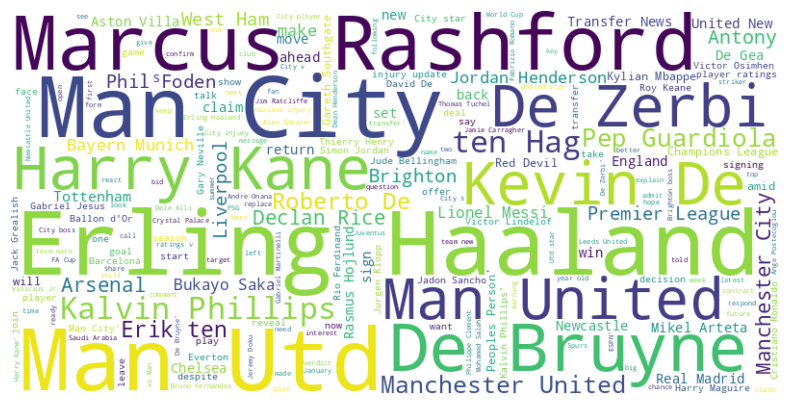

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Word Cloud
all_text = ' '.join(flat_nlp_df['player_sentence'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# flat_nlp_df = flat_nlp_df.to_csv('/content/drive/MyDrive/Project_excel_files/flat_result.csv')

In [ ]:
import pandas as pd
import numpy as np
flat_nlp_df = pd.read_csv('/content/drive/MyDrive/Project_excel_files/flat_result.csv')
flat_nlp_df.drop(columns = ['Unnamed: 0'], inplace = True)
flat_nlp_df.head()

,player_name,sentiment_score,player_sentence,date
0,Rashford,1,['Gran in crash with Marcus Rashford had no id...,2023-09-25 15:58:13
1,Kalvin Phillips,4,"[""Kalvin Phillips says Kalvin Phillips is actu...",2023-09-25 20:09:39
2,Billy Gilmour,4,"[""'We knew' - Billy Gilmour makes Kaoru Mitoma...",2023-09-25 19:48:07
3,Kaoru Mitoma,4,"[""'We knew' - Billy Gilmour makes Kaoru Mitoma...",2023-09-25 19:48:07
4,Roberto De,4,"[""'We knew' - Billy Gilmour makes Kaoru Mitoma...",2023-09-25 19:48:07


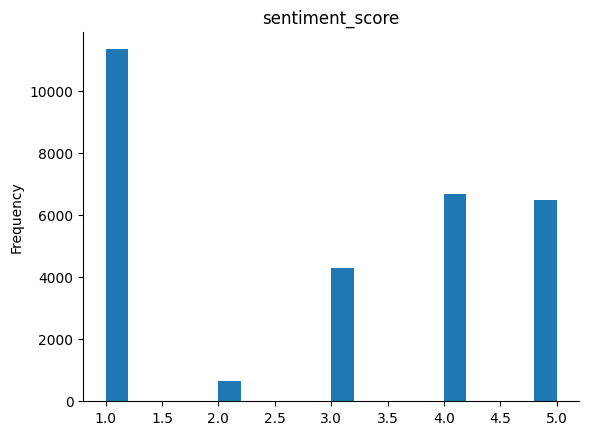

In [ ]:
# @title sentiment_score

from matplotlib import pyplot as plt
flat_nlp_df['sentiment_score'].plot(kind='hist', bins=20, title='sentiment_score')
plt.gca().spines[['top', 'right',]].set_visible(False)